# A comparison of text distance algorithms

In [38]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

plt.style.use("style.mplstyle")

colors = ["#003f5c", "#d45087", "#ffa600", "#665191", "#ff7c43", "#2f4b7c", "#f95d6a", "#a05195"]

In [39]:
s1 = "Obama speaks to the media in Illinois"
s2 = "The president greets the press in Chicago"
s3 = "Duck"
s4 = "Cool"
s5 = "Supercalifragilistichespiralidoso"

corpus = [s1, s2, s3, s4, s5]

vectorizer = CountVectorizer()
vectorizer.fit(corpus)

matrix = vectorizer.fit_transform(corpus)

table = matrix.todense()
df = pd.DataFrame(table, 
                  columns=vectorizer.get_feature_names_out(), 
                  index=['text_1', 'text_2', 'text_3', 'text_4', 'text_5'])

df.head()

,chicago,cool,duck,greets,illinois,in,media,obama,president,press,speaks,supercalifragilistichespiralidoso,the,to
text_1,0,0,0,0,1,1,1,1,0,0,1,0,1,1
text_2,1,0,0,1,0,1,0,0,1,1,0,0,2,0
text_3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
text_4,0,1,0,0,0,0,0,0,0,0,0,0,0,0
text_5,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Text distance algorithms

In [40]:
def euclidean_distance(s1, s2, vectorizer):
    vector1 = vectorizer.transform([s1]).toarray()
    vector2 = vectorizer.transform([s2]).toarray()
    distance = np.linalg.norm(vector1 - vector2)
    return distance

def cosine_distance(s1, s2, vectorizer):
    vector1 = vectorizer.transform([s1]).toarray()
    vector2 = vectorizer.transform([s2]).toarray()
    similarity_matrix = cosine_similarity(vector1, vector2)
    distance = 1 - similarity_matrix[0, 0]
    return distance

def manhattan_distance(s1, s2, vectorizer):
    vector1 = vectorizer.transform([s1]).toarray()
    vector2 = vectorizer.transform([s2]).toarray()
    distance = np.sum(np.abs(vector1 - vector2))
    return distance

def hamming_distance(s1, s2, vectorizer):
    vector1 = vectorizer.transform([s1]).toarray()
    vector2 = vectorizer.transform([s2]).toarray()
    distance = np.sum(vector1 != vector2)
    return distance

In [41]:
def plot_distances(s1: str, s2: str, vectorizer, ax=None):
    if ax:
        # Calculate distances
        euclidean_dist = euclidean_distance(s1, s2, vectorizer)
        cosine_dist = cosine_distance(s1, s2, vectorizer)
        manhattan_dist = manhattan_distance(s1, s2, vectorizer)

        ax.scatter([s1, s2], [0, euclidean_dist], label='Euclidean', color=colors[0])
        ax.scatter([s1, s2], [0, cosine_dist], label='Cosine', color=colors[1])
        ax.scatter([s1, s2], [0, manhattan_dist], label='Manhattan', color=colors[2])

        # Connect the points with lines
        ax.plot([s1, s2], [0, euclidean_dist], linestyle='-', color=colors[0])
        ax.plot([s1, s2], [0, cosine_dist], linestyle='-', color=colors[1])
        ax.plot([s1, s2], [0, manhattan_dist], linestyle='-', color=colors[2])

        # Annotate the distance values
        ax.text(s1, 0, f'{s1}\n(0, 0)', ha='center', va='bottom')
        ax.text(s2, euclidean_dist, f'{s2}\n({euclidean_dist:.2f}, {euclidean_dist:.2f})', ha='center', va='bottom')
        ax.text(s2, cosine_dist, f'{s2}\n({cosine_dist:.2f}, {cosine_dist:.2f})', ha='center', va='bottom')
        ax.text(s2, manhattan_dist, f'{s2}\n({manhattan_dist:.2f}, {manhattan_dist:.2f})', ha='center', va='bottom')
        ax.legend()
        
    else:
        # Calculate distances
        euclidean_dist = euclidean_distance(s1, s2, vectorizer)
        cosine_dist = cosine_distance(s1, s2, vectorizer)
        manhattan_dist = manhattan_distance(s1, s2, vectorizer)

        # Create a scatter plot
        plt.scatter([s1, s2], [0, euclidean_dist], label='Euclidean', color=colors[0])
        plt.scatter([s1, s2], [0, cosine_dist], label='Cosine', color=colors[1])
        plt.scatter([s1, s2], [0, manhattan_dist], label='Manhattan', color=colors[2])

        # Connect the points with lines
        plt.plot([s1, s2], [0, euclidean_dist], linestyle='-', color=colors[0])
        plt.plot([s1, s2], [0, cosine_dist], linestyle='-', color=colors[1])
        plt.plot([s1, s2], [0, manhattan_dist], linestyle='-', color=colors[2])

        # Annotate the distance values
        plt.text(s1, 0, f'{s1}\n(0, 0)', ha='center', va='bottom')
        plt.text(s2, euclidean_dist, f'{s2}\n({euclidean_dist:.2f}, {euclidean_dist:.2f})', ha='center', va='bottom')
        plt.text(s2, cosine_dist, f'{s2}\n({cosine_dist:.2f}, {cosine_dist:.2f})', ha='center', va='bottom')
        plt.text(s2, manhattan_dist, f'{s2}\n({manhattan_dist:.2f}, {manhattan_dist:.2f})', ha='center', va='bottom')

        # Set labels and title
        plt.xlabel('Sentences')
        plt.ylabel('Distance')
        plt.title('Distances between sentences')
        plt.legend()

        # print(f"Euclidean distance: {euclidean_dist:.2f}, Cosine distance: {cosine_dist:.2f}, Manhattan distance: {manhattan_dist:.2f}, Hamming distance: {hamming_dist}")

        # Show the plot
        plt.figtext(0.5, 0.01, f'Euclidean: {euclidean_dist:.2f}, Cosine: {cosine_dist:.2f}, Manhattan: {manhattan_dist:.2f}', ha='center', va='bottom')
        plt.show()


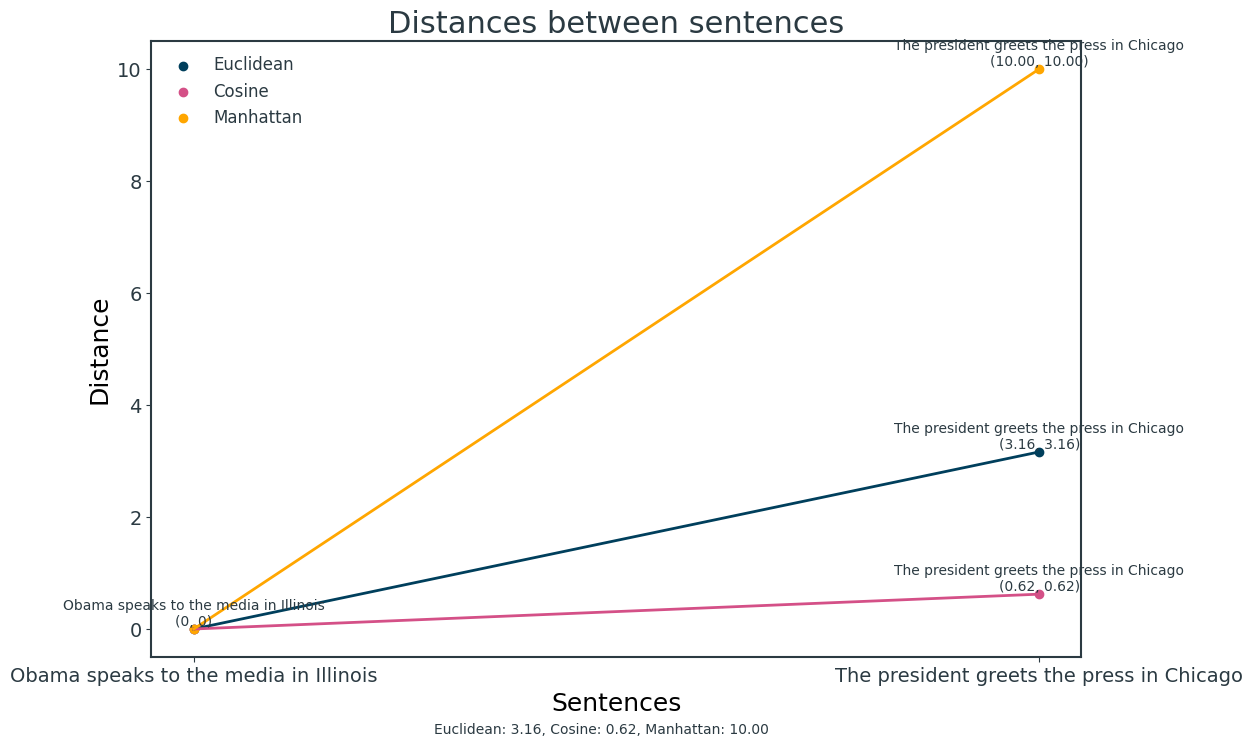

In [42]:
plot_distances(s1, s2, vectorizer=vectorizer)

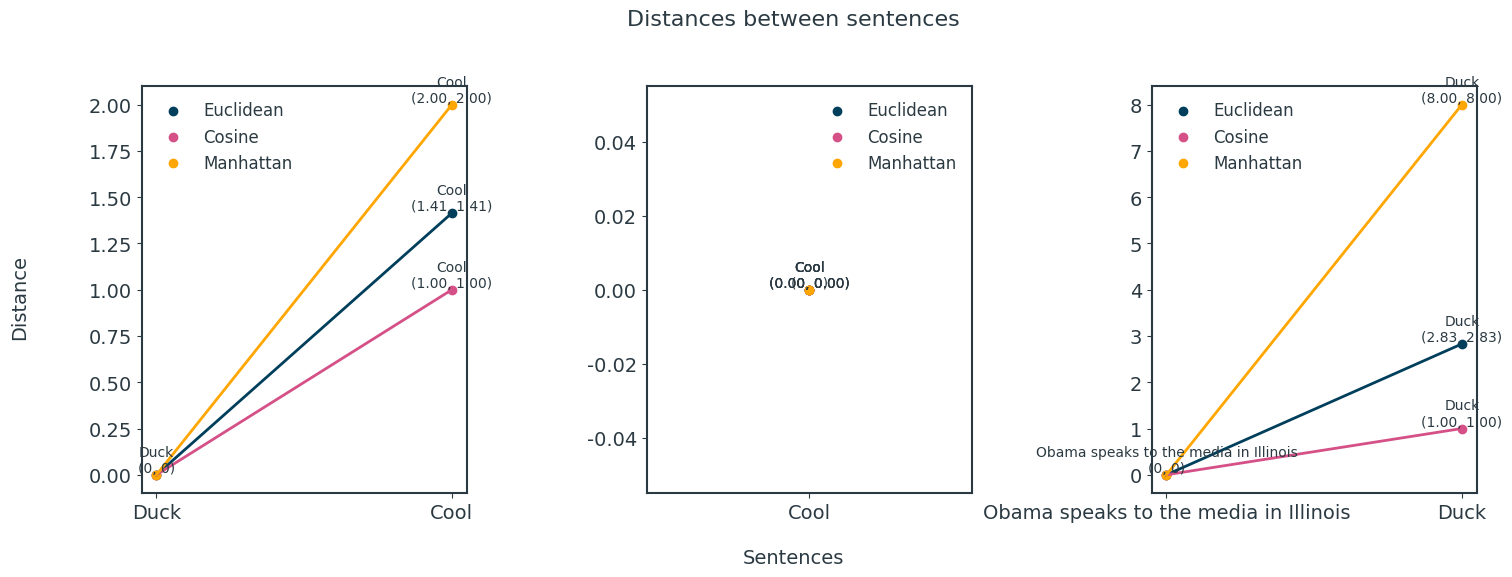

In [43]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot each pair on the same set of axes
plot_distances(s3, s4, vectorizer, ax=axes[0])
plot_distances(s4, s4, vectorizer, ax=axes[1])
plot_distances(s1, s3, vectorizer, ax=axes[2])

# Set labels and title for the entire figure
fig.suptitle('Distances between sentences', fontsize=16)
fig.text(0.5, 0.05, 'Sentences', ha='center', va='bottom', fontsize=14)
fig.text(0.07, 0.5, 'Distance', ha='center', va='center', rotation='vertical', fontsize=14)

plt.legend()
plt.tight_layout(rect=[0.1, 0.1, 0.9, 0.95])
plt.show()

### Distribution distance

In [44]:
import re
from collections import Counter

def get_distribution(text):
    words = re.findall(r'\b\w+\b', text.lower())
    word_count = len(words)
    distribution = Counter(words)
    distribution = {word: count / word_count for word, count in distribution.items()}
    return distribution

def kl_divergence(p, q):
    return sum(p[word] * np.log2(p[word] / q[word]) for word in p.keys() if p[word] > 0 and q[word] > 0)

def js_divergence(p, q):
    m = {word: 0.5 * (p[word] + q[word]) for word in p.keys() & q.keys()}
    return 0.5 * (kl_divergence(p, m) + kl_divergence(q, m))

def js_divergence_between_sentences(sentence1, sentence2):
    distribution1 = get_distribution(sentence1)
    distribution2 = get_distribution(sentence2)
    
    # Ensure all words in both distributions
    all_words = set(list(distribution1.keys()) + list(distribution2.keys()))
    distribution1 = {word: distribution1.get(word, 0) for word in all_words}
    distribution2 = {word: distribution2.get(word, 0) for word in all_words}
    
    jsd = js_divergence(distribution1, distribution2)
    return jsd

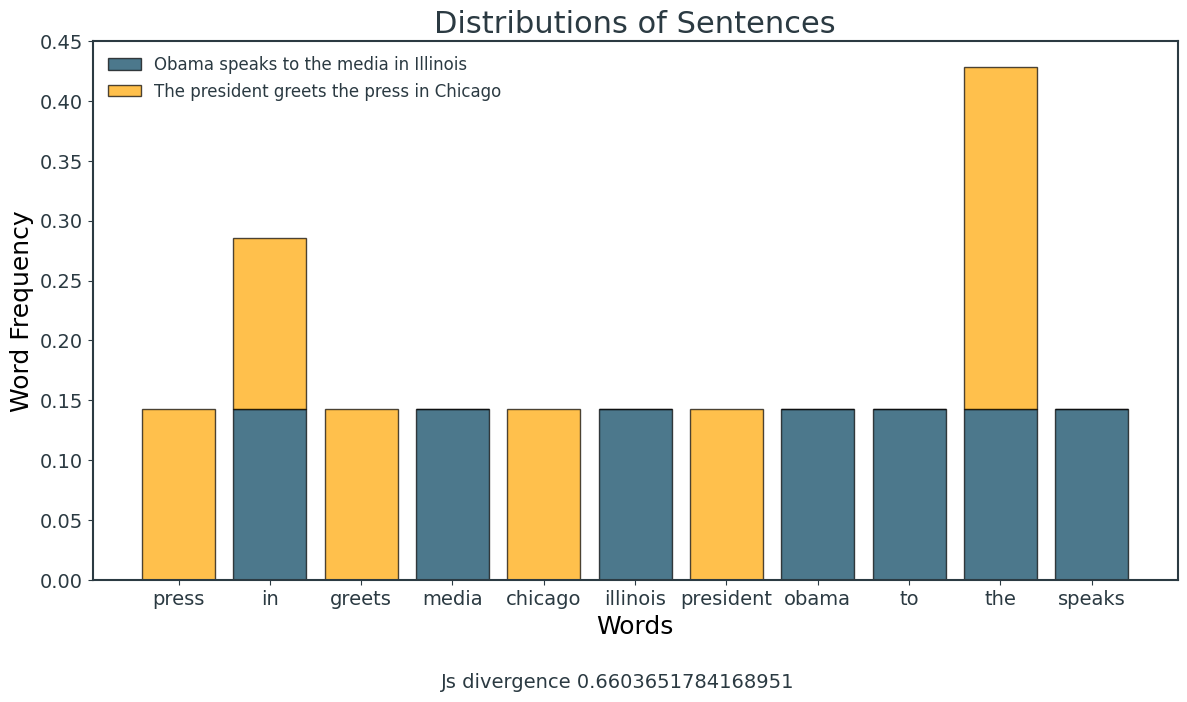

In [45]:
def plot_distributions(ax, s1: str, s2: str):
    distribution1 = get_distribution(s1)
    distribution2 = get_distribution(s2)
    
    # Get all unique words from both distributions
    all_words = list(set(distribution1.keys()) | set(distribution2.keys()))
    
    # Create arrays for word frequencies in both distributions
    freq1 = np.array([distribution1.get(word, 0) for word in all_words])
    freq2 = np.array([distribution2.get(word, 0) for word in all_words])
    
    # Plot bar charts for each distribution
    ax.bar(all_words, freq1, alpha=0.7, label=s1, color=colors[0], ec="black")
    ax.bar(all_words, freq2, alpha=0.7, label=s2, color=colors[2], bottom=freq1, ec="black")
    
    # Set labels and title
    ax.set_xlabel('Words')
    ax.set_ylabel('Word Frequency')
    ax.set_title('Distributions of Sentences')
    ax.legend()

fig, ax = plt.subplots(figsize=(14, 7))
plot_distributions(ax, s1, s2)

string = f'Js divergence {js_divergence_between_sentences(s1, s2)}'
fig.text(0.5, -0.05, string, ha='center', va='bottom', fontsize=14)
plt.show()

### Semantic distance

## Text Representation

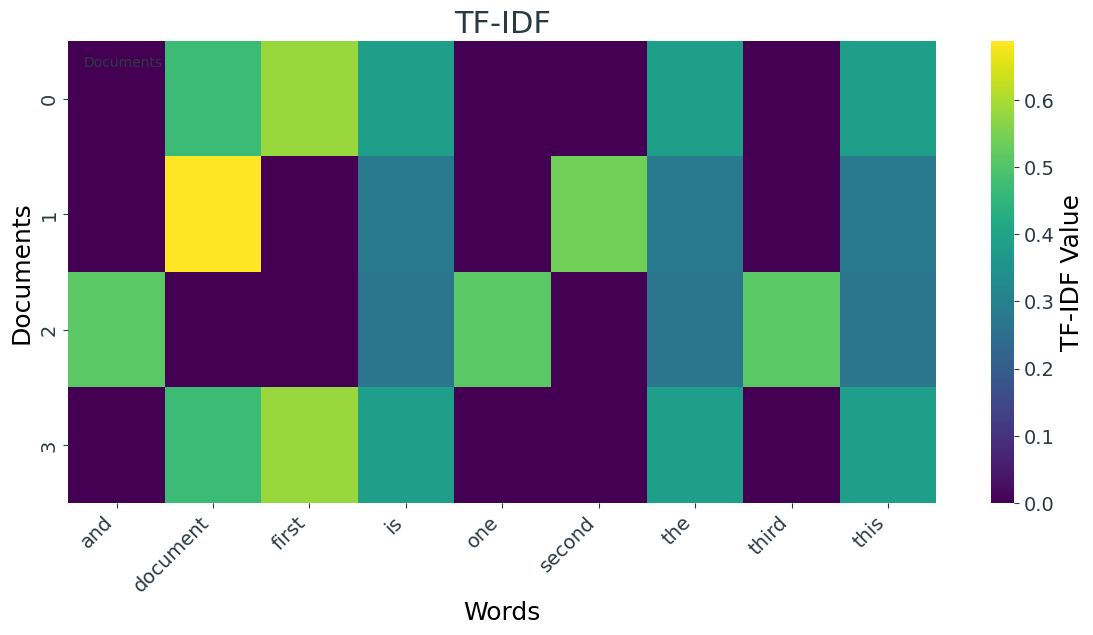

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Sample documents
documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(documents)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a dense matrix for easier inspection
dense_matrix = tfidf_matrix.todense()

# Create a DataFrame for better visualization
df = pd.DataFrame(dense_matrix, columns=feature_names)

# Plot the heatmap
plt.figure(figsize=(14, 6))
heatmap = sns.heatmap(df, cmap='viridis', cbar_kws={'label': 'TF-IDF Value'})

# Set x-axis labels as legends
heatmap.set_xticklabels(feature_names, rotation=45, ha='right')

plt.title('TF-IDF')
plt.xlabel('Words')
plt.ylabel('Documents')
plt.show()

print(documents)